In [ ]:
import os
import shutil
import random


In [ ]:
# Define paths
data_dir = "/content/drive/MyDrive/Project Material/AIML and DA Extracted Frames"
train_dir = "/content/drive/MyDrive/Project Material/AIML and DA/train"
val_dir = "/content/drive/MyDrive/Project Material/AIML and DA/validate"
test_dir = "/content/drive/MyDrive/Project Material/AIML and DA/test"


In [ ]:
# # Create directories for train, validate, and test sets
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)


In [ ]:
# # Define the percentage of data for train, validate, and test sets
# train_split = 0.80
# val_split = 0.10
# test_split = 0.10


In [ ]:
# # Loop through each UID folder
# for uid_folder in os.listdir(data_dir):
#     uid_path = os.path.join(data_dir, uid_folder)
#     if os.path.isdir(uid_path):

#         # Create corresponding directories in train, validate, and test sets
#         train_uid_path = os.path.join(train_dir, uid_folder)
#         os.makedirs(train_uid_path, exist_ok=True)
#         val_uid_path = os.path.join(val_dir, uid_folder)
#         os.makedirs(val_uid_path, exist_ok=True)
#         test_uid_path = os.path.join(test_dir, uid_folder)
#         os.makedirs(test_uid_path, exist_ok=True)

#         # Get list of image files
#         images = os.listdir(uid_path)
#         num_images = len(images)

#         # Shuffle the list of images
#         random.shuffle(images)

#         # Split the data into train, validate, and test sets
#         train_end_index = int(num_images * train_split)
#         val_end_index = train_end_index + int(num_images * val_split)
#         train_images = images[:train_end_index]
#         val_images = images[train_end_index:val_end_index]
#         test_images = images[val_end_index:]

#         # Move images to corresponding directories
#         for image in train_images:
#             shutil.copy(os.path.join(uid_path, image), os.path.join(train_uid_path, image))
#         for image in val_images:
#             shutil.copy(os.path.join(uid_path, image), os.path.join(val_uid_path, image))
#         for image in test_images:
#             shutil.copy(os.path.join(uid_path, image), os.path.join(test_uid_path, image))


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Define image size and other parameters
image_size = (224, 224)
batch_size = 32
num_classes = len(os.listdir(train_dir))


In [ ]:
# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1764 images belonging to 19 classes.


In [ ]:
# Flow validation images in batches using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 213 images belonging to 19 classes.
Found 235 images belonging to 19 classes.


In [ ]:
# Load pre-trained VGG model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Add new layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Create the new model
model = Model(inputs=base_model.input, outputs=output)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
56/56 [==============================] - 907s 16s/step - loss: 2.6403 - accuracy: 0.3821 - val_loss: 0.5828 - val_accuracy: 0.9202
Epoch 2/10
56/56 [==============================] - 52s 923ms/step - loss: 0.7797 - accuracy: 0.8214 - val_loss: 0.2008 - val_accuracy: 0.9390
Epoch 3/10
56/56 [==============================] - 51s 909ms/step - loss: 0.4045 - accuracy: 0.9110 - val_loss: 0.0882 - val_accuracy: 0.9812
Epoch 4/10
56/56 [==============================] - 50s 888ms/step - loss: 0.2983 - accuracy: 0.9354 - val_loss: 0.0760 - val_accuracy: 0.9812
Epoch 5/10
56/56 [==============================] - 51s 907ms/step - loss: 0.2141 - accuracy: 0.9512 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 6/10
56/56 [==============================] - 49s 877ms/step - loss: 0.1770 - accuracy: 0.9541 - val_loss: 0.0316 - val_accuracy: 0.9953
Epoch 7/10
56/56 [==============================] - 50s 899ms/step - loss: 0.1560 - accuracy: 0.9660 - val_loss: 0.0356 - val_accuracy: 0.9906


In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


8/8 [==============================] - 141s 20s/step - loss: 0.0414 - accuracy: 0.9787
Test Loss: 0.041362252086400986
Test Accuracy: 0.978723406791687


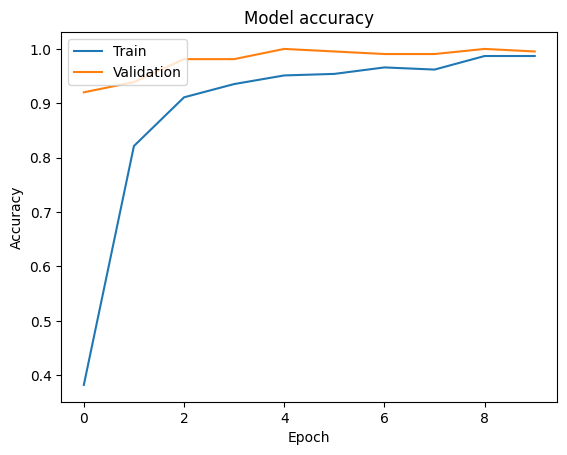

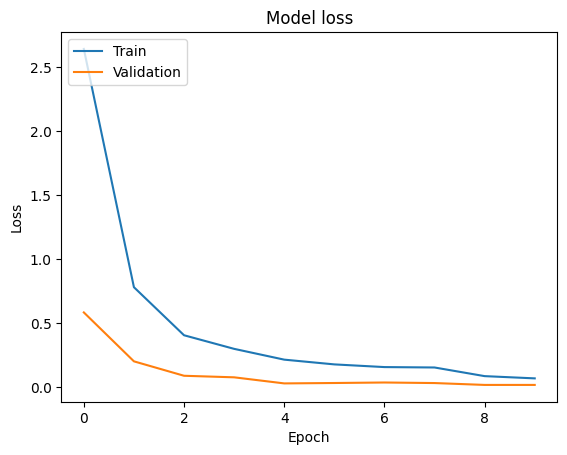

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/Project Material/AIML and DA/Face-Recognition.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load the trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/Project Material/AIML and DA/Face-Recognition.h5")

# Define a function to load class names (UIDs)
def load_class_names(train_dir):
    return sorted(os.listdir(train_dir))

# Define a function to perform face recognition
def recognize_face(image_path, class_names):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize pixel values
    classes = model.predict(x)
    predicted_class_index = np.argmax(classes)
    confidence = classes[0][predicted_class_index]
    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_name, confidence

# Load class names (UIDs)
class_names = load_class_names("/content/drive/MyDrive/Project Material/AIML and DA/train")

# Test the face recognition function
image_path = input("Enter path: ")  # Replace with the path to your test image
predicted_class, confidence = recognize_face(image_path, class_names)
print("Predicted Class (UID):", predicted_class)
print("Confidence:", confidence)


Enter path: /content/drive/MyDrive/Project Material/AIML and DA/test/TNU2020053100031l/0_DSC_1376.jpg
1/1 [==============================] - 0s 140ms/step
Predicted Class (UID): TNU2020053100031l
Confidence: 0.99978703
